# Perceptron vs. Linear Regression for Classification
In this Exercise we compare the Perceptron learning algorithm with linear regression as a means for classification.

Along the way, we will get some acquaintance with the [Python](https://www.python.org/) programming language, and particular [NumPy](http://www.numpy.org/) and [MatplotLib](http://matplotlib.org/) from the [scipy](https://scipy.org/) ecosystem, as a language for machine learning. We will be using Python 3 here, which is not compatible with Python 2.x. For an introduction to Python the [Python Tutorial](https://docs.python.org/3.5/tutorial/index.html) is a great place to start; Similarly for [Getting Started](http://scipy.org/getting-started.html) with the Numpy and Matplotlib good places to start are the Numpy [Quickstart tutorial](http://docs.scipy.org/doc/numpy-dev/user/quickstart.html) and the [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html). If you have earlier experience with MATLAB, then the [Numpy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html) document is a useful reference.

But try first to jump right into the exercise below and confer these resources as needed. You can solve the exercise directly in this Jupyter notebook, but you can also copy the relevant code snippets to a separate .py file and for example use [IPython](http://ipython.readthedocs.io/en/stable/) to develop and test your code.

In this exercise we are given several data sets of the following form:
$D = \{(x,y) \mid x\in \{1\} \times \mathbb{R}^2, y \in \{-1,+1\}\}$
Here the input domain for the point sets is two dimensional which allows us to visualize them. In the data sets we have already added the dummy variable $x[0] = 1$ for all the points. So do not let the three dimensions confuse you, and lets load the data and afterwards plot the relevant two dimensions of the data instead.


In [13]:
# Enable plotting directly in the notebook
%matplotlib inline
# import NumPy and MatplotLib pyplot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

D = np.load("ex1_data.npz")
D.files

['dat3', 'target3', 'target2', 'dat4', 'target4', 'target1', 'dat2', 'dat1']

Here we have loaded the data from the zipped archive file "ex1_data.npz". Each file in the archive is a NumPy array in the Numpy .npy format. The files attribute of D lists all the files in the archive.

Shape of X1: (50, 3)
What is X[0,0]: 1.0
First 3 rows and columns of X1:
[[ 1.          0.88124995  0.6332219 ]
 [ 1.          0.69868462  0.71099737]
 [ 1.          0.31830921  0.83082757]]


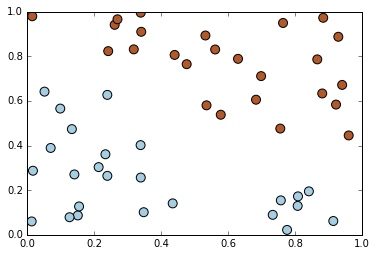

In [3]:
# Extract the first dataset
X1 = D['dat1']
Y1 = D['target1']

# X1 is a n x 3 NumPy-array.
print('Shape of X1:',X1.shape)

# NumPy arrays are indexes from 0. X1[0,0] is the first value of the first input point (and should be 1)
print('What is X[0,0]: {0}'.format(X1[0,0]))

# We can also index rows and columns of the NumPy array. For instance the first column is X1[:,0]
# Here : indexes all rows and 0 indexes the first colums. This notation also supports ranges natually.
# As an example lets see the first 3 rows and columns
print("First 3 rows and columns of X1:")
print(X1[0:3,0:3])

# To plot a point set we use the scatter plot functionality and set the color of each point according to the labels. 
# We plot the second, and third column ignoring the 1 column. For the color of each point we use the label.
# For more info on scatter plots we can simply write "plt.scatter?" in the Code cell below and run the cell
plt.axis([0, 1, 0, 1])
plt.scatter(X1[:, 1], X1[:, 2], c=Y1, cmap=plt.cm.Paired, s=80)

In [4]:
# Try to type "plt.scatter?" below and run the cell (Ctrl-enter)
plt.scatter?



# Hyperplanes
In this exercise we are looking at the task of finding good hyperplanes that separate the data and be used as classifiers.
In 2D hyperplanes are just lines that split the plane into two halfplanes.

So how do plot such things? Let's start with plotting a line and then we will see if you can actually plot a hyperplane.

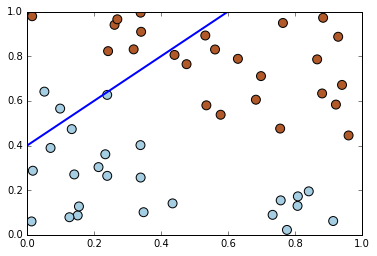

In [4]:
# Just plot the data set again. Same code as above.
plt.axis([0, 1, 0, 1])
plt.scatter(X1[:,1],X1[:,2],c=Y1,cmap=plt.cm.Paired,s=80)
# Now we will use the most basic plotting command plot to plot a line.
# The plot command takes a list of x coordinates and a list of y coordinates and then printing options.
# '-b' means connect the points with a line and use color b=blue, linewidth is, wait for it..., the width of the line.
plt.plot([0,0.6],[0.4,1],'-b',linewidth=2)
# And you should also by now be able to guess how to get more info on the plt command, right? 

# Plotting Hyperplanes - special case through the origin.
A hyperplane is represented by a vector $w$ and we need to plot the set $\{x \mid w^\intercal x = 0\}$ which in 2D is a line.
What we learned above is how to plot a line between two points. So what we really need is to determine two points on the boundary of the plot.

Lets say we get the hyperplane $w=[0,1,1]$. Since the first coordinate of $w$ is 0, this means that the hyperplane is a line through the origin. (Recall that the origin is given as (1,0,0) after introducing the dummy coordinate).
This corresponds to the equation $x_1 +x_2 = 0$. How can we plot this in the input range $R = [-1,1] \times [-1,1]$ ?
We need to plot the set of points in $R$ that are orthogonal to $w$. For this simple case it is easy to see that the line goes through the two corners (-1,1) and (1,-1) of the input range. So the intersection of the line with the input range is exactly the line between these corners. Let's code that.

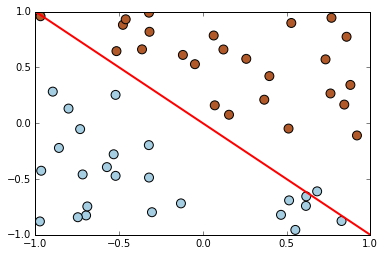

In [5]:
# To fill the plot with some points we make a rescaling of our data to [-1,1] x [-1,1] instead of [0,1] x [0,1]
X1r = X1.copy()
X1r[:,1] = X1r[:,1]*2 -1
X1r[:,2] = X1r[:,2]*2 -1
plt.axis([-1, 1, -1, 1])
# Plot points
plt.scatter(X1r[:,1],X1r[:,2],c=Y1,cmap=plt.cm.Paired,s=80)
# Plot hyperplane
plt.plot([-1,1],[1,-1],'-r',linewidth=2)

For a generic $w=(0,w_1,w_2)$ we would have the equation $w_1 x_1 + w_2 x_2 = 0$. How can we find two points on the boundary? 
$\textit{With SymPy You can Calculate the unknown value. Eg. if you need a point on the boundary where x = 1 you can find y.}$

# Plotting hyperplanes - general case
To make the task of plotting a hyperplane a little easier, we may instead take advantage of the fact the MatplotLib does automatic clipping. So we may choose two points on the hyperplane which is on the boundary or possibly outside of the input range. Suppose that the input range is $R= [0,1] \times [0,1]$ again. Suppose that the hyperplane intersects the two vertical lines $x_2 = 0$ and $x_2 = 1$. In that case we may simply choose these two intersection points as the endpoints of our line.

## Task 1:
Plot the hyperplane represented by $w=[-1.0,1.0,1.0]$ on the initial data set in the range $[0,1] \times [0,1]$.

Approach:
Find the $x_2$-coordinate for the hyperplane (line) at $x_1=0$ and at $x_1=1$.

You need to solve the hyperplane equations to do it:
This equation is $w^\intercal x = 0$ which is $w_0 \cdot 1 + w_1 \cdot x_1 + w_2 \cdot x_2 = 0$, and if you know all but one variable you should be able to solve it.

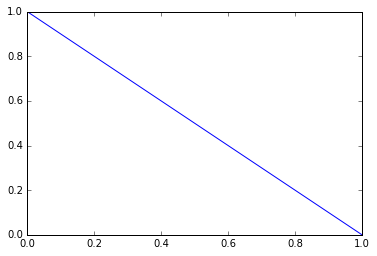

In [21]:
# Write code here to create two NumPy arrays x and y that contain the x and y coordinates
# of the two endpoints of the line to be drawn.
w = np.array((-1,1,1))

func1 = lambda x2 : np.dot(w, np.array((1,0,x2))) 
initial_guess = 1.5
solution1 = fsolve(func1, initial_guess)
x = np.array((0,solution1))

func2 = lambda x2 : np.dot(w, np.array((1,1,x2))) 
solution2 = fsolve(func2, initial_guess)

y = np.array((1,solution2))

plt.axis([0,1,0,1])
plt.plot(x,y)

## Task 2:

For a generic $w=(w_0,w_1,w_2)$ we have the equation $w_0 + w_1 x_1 + w_2 x_2 = 0$. How can we find these two points in general? How about a general input range $R=[x_\min,x_\max] \times [y_\min,y_\max]$?

Finally, complete the function plot_hyperplane below. Remember to handle possible special cases! Notice how we pass along optional arguments to the plot function, which allows us to change color, etc. of the hyperplanes.

-0.166666666667
0.166666666667
3.5
0.5
2
[array([ 0.16666667,  1.        ]), array([ 0. ,  0.5])]
[ 0.16666667  0.        ]
[ 1.   0.5]
-1.33333333333
2.66666666667
0.583333333333
0.333333333333
2
[array([ 1.        ,  0.58333333]), array([ 0.        ,  0.33333333])]
[ 1.  0.]
[ 0.58333333  0.33333333]


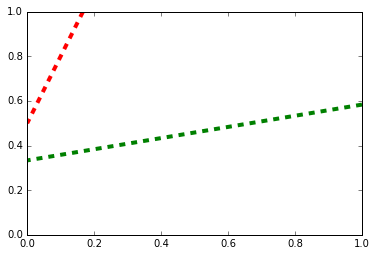

In [73]:
# function to plot a hyperplane in 2D

def find_solution_for_x(w, y, initial_guess): 
    func1 = lambda x : np.dot(w, np.array((1,x,y))) 
    return fsolve(func1, initial_guess)[0]

def find_solution_for_y(w, x, initial_guess): 
    func1 = lambda y : np.dot(w, np.array((1,x,y))) 
    return fsolve(func1, initial_guess)[0]

def plot_hyperplane(w, *args, **kwargs): 
    if w[1]==0 and w[2]==0: raise ValueError('Invalid hyperplane')
    xmin,xmax,ymin,ymax=plt.axis()
    cut_points = [];
    # Write code here to create two NumPy arrays x and y that contain the x and y coordinates
    # of the two endpoints of the line to be drawn.
    mean_x = xmax - xmin
    mean_y = ymax - ymin
    solution_ymin = find_solution_for_x(w, ymin, mean_x)
    print(solution_ymin)
    if xmin <= solution_ymin and solution_ymin <= xmax :
        cut_points.append(np.array((solution_ymin, ymin)));
        
    solution_ymax = find_solution_for_x(w, ymax, mean_x)
    print(solution_ymax)
    if xmin <= solution_ymax and solution_ymax <= xmax :
        cut_points.append(np.array((solution_ymax, ymax)));    

    solution_xmax = find_solution_for_y(w, xmax, mean_y)
    print(solution_xmax)
    if ymin <= solution_xmax and solution_xmax <= ymax :
        cut_points.append(np.array((xmax, solution_xmax)));    
    
    solution_xmin = find_solution_for_y(w, xmin, mean_y)
    print(solution_xmin)
    if ymin <= solution_xmin and solution_xmin <= ymax :
        cut_points.append(np.array((xmin, solution_xmin)));    
    
    print(len(cut_points))
    print(cut_points)
    if len(cut_points) < 2:
        return
    x = np.array((cut_points[0][0],cut_points[1][0]))
    y = np.array((cut_points[0][1],cut_points[1][1]))

    print(x)
    print(y)
    # plot the line
    plt.plot(x,y,*args,**kwargs)

# testing the function

plt.axis([0,1,0,1])
plot_hyperplane((0.5,3,-1), 'r--',linewidth=4)
plot_hyperplane((1,0.75,-3), 'g--',linewidth=4)

# The Algorithms
Now that we know how to visualize the data and our hypotheses (hyperplanes) it is time to implement the algorithms.

### Perceptron
The Perceptron algorithm finds a hyperplane represented by a parameter vector $w_{\textrm{pla}}$ that splits the input
domain such that all points with $+1$ labels is on one side of the hyperplane and the points with labels
$-1$ on the other (if that is possible). To label a new point $x$, simple output $\textrm{sign}(w_\textrm{pla}^\intercal x)$

### Linear regression 
Linear regression computes the linear model (line in 2D) that
best approximates the real valued target (we compute the parameter vector 
$$
w_{\textrm{lin}} = \textrm{argmin}_w \sum_i (w^\intercal x_i -y_i)^2
$$

The labels are either $+1$ or $-1$, but that is of course a small subset of the real numbers, so linear regression finds the best linear fit to these values over the input points. We can use exactly the same method to classify new points i.e. $\textrm{sign}(w_\textrm{lin}^\intercal x)$ which is meaningfull in the sense that linear regression have tried to fit +1 and -1 and as such the sign makes sense.

## Task 3:
* Implement Linear Regression
* Implement Perceptron Algorithm 

We have given a simple template below for both containing relevant comments for your benefit. You may find some more useful information about python and NumPy below.

In [ ]:
def pla_train(X, y, w=None):
    """
    Perceptron learning algorithm
    """
    # if not starting vector is given we set it to the zero vector
    if w is None:
        w = np.zeros(X.shape[1])
    # Run the perceptron iteration
    
    ...
        
    return w

def lin_reg_train(X,y):
    """ Linear Regression Learning Algorithm
    The pseudo-inverse operator in numpy.linalg package may be usefull.
    """  
    w = np.zeros(X.shape[1])  # Change this!
    return w

def plot_result(dat,target,w_lin,w_pla,title):
    """
    Plot decision boundaries
    """
    plt.figure(figsize=(10,8))
    plt.axis([dat[:, 1].min(),dat[:, 1].max(),dat[:, 2].min(),dat[:, 2].max()])
    
    #Compute In Sample Error for the two models
    p_in = 0  # Change this!
    l_in = 0  # Change this!
    
    print(title, '- In Sample Error:\n\tPerceptron: {0}\n\tLinear Regression: {1}'.format(p_in,l_in))
    # plot data
    plt.scatter(dat[:,1],dat[:,2],c=target,cmap=plt.cm.Paired,s=20)
    #plot pla line
    plot_hyperplane(w_pla,'r--',linewidth=4,label='perceptron')    
    #plot lin reg line
    plot_hyperplane(w_lin,'g--',linewidth=4,label='lin. reg.')    
    
    plt.legend()
    plt.title(title)


dat = D
dsets = [(dat['dat%d' % i], dat['target%d' % i]) for i in range(1, 5)]
for i,(X,y) in enumerate(dsets):
    w_pla = pla_train(X,y,np.zeros(3))
    w_lin = lin_reg_train(X,y)
    plot_result(X,y,w_lin,w_pla,"Data Set {0}".format(i+1))

# A bit more about Python, NumPy, and MatplotLib

## Loading and saving data
We can load and save NumPy arrays using the commands load and savez

In [9]:
dat = np.ones((7,3))
target = -1 * np.ones((7,))
np.savez('myfile.npz',dat=dat, target=target)
myfile = np.load('myfile.npz')
dat = myfile['dat']
target = myfile['target']

## Boolean arrays (aka filters)

From Boolean expressions used on NumPy arrays we can compute arrays of Booleans. This is sometimes also called a *filter*. The reason for this is that we can use a Boolean array for indexing another array. We can also extract an array of the true indices of a filter. This can be useful in conjunction with np.random.choice

In [10]:
# random array of -1,1 values
y = 2*np.random.randint(2, size=10)-1
# construct filter for indices with value 1
pos = (y==1)
# get array of true indices
indices = pos.nonzero()[0]
# the array y
print(y)
# the filter obtained from y
print(pos)
# printed as 0/1 values
print(pos.astype(int))
# the true indices
print(indices)
# selecting a random index
print('Random index of a 1 entry of y:',np.random.choice(indices))

[-1 -1  1 -1  1 -1  1  1  1  1]
[False False  True False  True False  True  True  True  True]
[0 0 1 0 1 0 1 1 1 1]
[2 4 6 7 8 9]
Random index of a 1 entry of y: 2


If we have two filters a and b, we can combine them using Pythons bitwise operators: a&b is the intersection, a|b is the union, and ~a is the complement of a. This is useful when plotting e.g. the data points with label -1 that are classified incorrectly by the hyperplane, or combined with np.random.choise(indices)

## Vectorization

Vectorization is an important concept for getting efficient Python code. What we mean by vectorization is doing batch processing of data avoiding the explicit use of for loops, and instead making use of internal implementations of array operations of NumPy. This is precisely what we did above for constructing filters. Try to experiment yourself! You can time your code using the timeit function of Python. You should find that the speed increase by vectorization is by orders of magnitude!

In [11]:
import timeit

def vectorized(y):
    pos = (y==1)
    return pos
    
def not_vectorized(y):
    len = y.shape[0]
    pos = np.zeros(len)
    for i in range(len):
        pos = y[i]==1
    return y

y = 2*np.random.randint(2, size=10000)-1

%timeit -n 100 vectorized(y)
%timeit -n 100 not_vectorized(y)

100 loops, best of 3: 7.7 µs per loop
100 loops, best of 3: 1.99 ms per loop


Notice also the use here of [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). For instance, in the line defining y, when we multiply the random array with 2, or subtracting 1, in fact the values 2 and 1 are treated as 1 dimensional arrays of size 1, which are then expanded into 1 dimensional arrays of size 10000, where the single entry is duplicated.

## Operations on vectors and matrices as NumPy arrays

In NumPy 1-dimensional arrays naturally models vectors and 2-dimensional arrays naturally models matrices.

In [12]:
a = np.array([1,2,3])     # 3-dimensional vector
b = np.array([[1,2,3]])   # 3-dimensional row vector (1x3 matrix)
c = np.array([[1,2,3]]).T # 3-dimensional column vector (3x1 matrix)
print('a = {}, ndim={}, shape={}'.format(a,a.ndim, a.shape))
print('b = {}, ndim={}, shape={}'.format(b,b.ndim, b.shape))
print('c = \n{}, ndim={}, shape={}'.format(c,c.ndim, c.shape))
A=np.arange(1,10).reshape(3,3)
print('aA =',np.dot(a,A))
print('Aa =',np.dot(A,a))
print('bA =',np.dot(b,A))
print('cA =',np.dot(A,c))

a = [1 2 3], ndim=1, shape=(3,)
b = [[1 2 3]], ndim=2, shape=(1, 3)
c = 
[[1]
 [2]
 [3]], ndim=2, shape=(3, 1)
aA = [30 36 42]
Aa = [14 32 50]
bA = [[30 36 42]]
cA = [[14]
 [32]
 [50]]


Notice that when multiplying the vector <tt>a</tt>
with the matrix <tt>A</tt> on the left, <tt>a</tt> behaves as a row vector, and when multiplying on the right <tt>a</tt> behaves as a column vector. The result is always a vector, whereas when multiplying by the corresponding row and column vectors <tt>b</tt> and <tt>c</tt> the result is again a row or column vector (since it is actually a matrix product).

With Python 3.5 and above we may also use the <tt>@</tt> operator, which is a shorthand for the matmul function (which can be used instead of the dot function).

In [13]:
print('aA =',a@A)
print('Aa =',A@a)
print('bA =',b@A)
print('cA =',A@c)

aA = [30 36 42]
Aa = [14 32 50]
bA = [[30 36 42]]
cA = [[14]
 [32]
 [50]]


You should mainly use just 1-dimensional arrays for vectors. One can convert between these and row and column vectors as follows:

In [14]:
print('a as a row vector :',np.expand_dims(a,axis=0))
print('a as a column vector :\n',np.expand_dims(a,axis=1))
print('b and c as vectors :', b.squeeze(),c.squeeze())

a as a row vector : [[1 2 3]]
a as a column vector :
 [[1]
 [2]
 [3]]
b and c as vectors : [1 2 3] [1 2 3]


So what are row and column vectors good for? In conjuction with broadcasting! Suppose we have an array of numbers, one for each row of the matrix, and we wish to subtract the given number for a row from each entry of the row. We can do this by just subtracting a column vector.

In [15]:
print(A-a) # subtracting a vector, the vector behaves as a row vector.
print(A-b) # subtracting a row vector.
print(A-c) # subtracting a column vector

[[0 0 0]
 [3 3 3]
 [6 6 6]]
[[0 0 0]
 [3 3 3]
 [6 6 6]]
[[0 1 2]
 [2 3 4]
 [4 5 6]]


Often this happens in the situation where the vector has been computed from the matrix, say with the <tt>mean</tt> operation.
In this case it is convinient to use the <tt>keepdims</tt> parameter. Actually, it can be a good idea to always explicitly use row or column vectors for this purpose to avoid confusion and bugs.

In [16]:
print('The matrix A:\n',A)
print('The means of the rows of A: ',np.mean(A,axis=1))
print('and as a column vector:\n',np.mean(A,axis=1,keepdims=True))
print('Each row translated to the mean:\n',A-np.mean(A,axis=1,keepdims=True))
print('And this is not what we wanted:\n',A-np.sum(A,axis=1))

The matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
The means of the rows of A:  [ 2.  5.  8.]
and as a column vector:
 [[ 2.]
 [ 5.]
 [ 8.]]
Each row translated to the mean:
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
And this is not what we wanted:
 [[ -5 -13 -21]
 [ -2 -10 -18]
 [  1  -7 -15]]


## Workflow of development with IPython

You can load and run code files and use within IPython. We can work on a [code file](mycode.py) in an editor, and then load and run it from IPython. The simplest was is by using the built-in magic command %run. This loads and directly runs the code file as a python script. The script is run into the interactive workspace.

In [ ]:
%run mycode

Another option is to import the code file as a module. After editing we can then reload the code.

In [ ]:
from importlib import reload # Python 3.4 and above. For earlier versions consult the documentation.
# initial load of the code file mycode.py
import mycode
mycode.main()
# After editing the file, we can reload and run
reload(mycode)
mycode.main()